# Linear Regression with Python Scikit Learn

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

## Problem statement

What will be Predicted score, if a student study for 9.25 hours in a day?

Dataset taken from : https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
# printing first five rows from dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 25 rows and 2 columns.


### Exploratory Data Analysis

In [5]:
# printing basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
print(f"The dataset has {df.shape[0]} number of entries and are of {df['Hours'].dtype} and {df['Scores'].dtype} data types")

The dataset has 25 number of entries and are of float64 and int64 data types


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
# checking for missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Data is clean, has no missing values.

## Data Visualization

### Bivariate Analysis

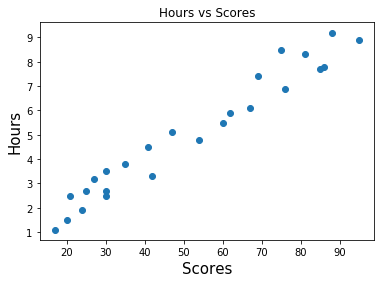

In [9]:
plt.xlabel('Scores', fontsize=15)
plt.ylabel('Hours', fontsize=15)
plt.title('Hours vs Scores')
plt.scatter(x='Scores', y='Hours',data=df, label='Hours vs Scores')
plt.show()

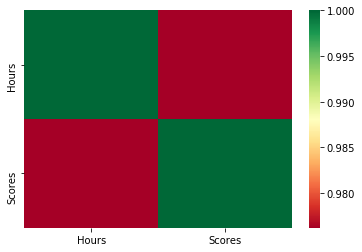

In [10]:
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='RdYlGn')
plt.show()

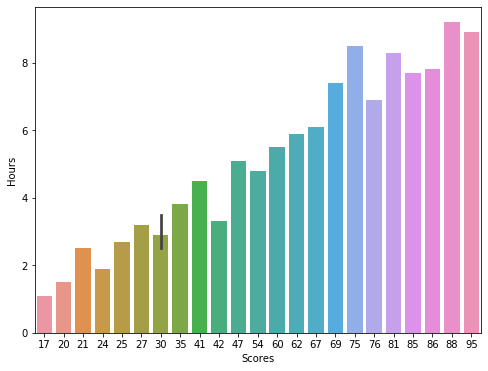

In [11]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Scores', y='Hours', data=df)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('Scores', axis=1)
y = df.Scores

# splitting data for traiing and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Applying Linear Regression Algorithm and Preparing model

In [14]:

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

pred = lin_reg.predict(X_test)

print('r2_score =',r2_score(y_test, pred))


r2_score = 0.9261002129276816


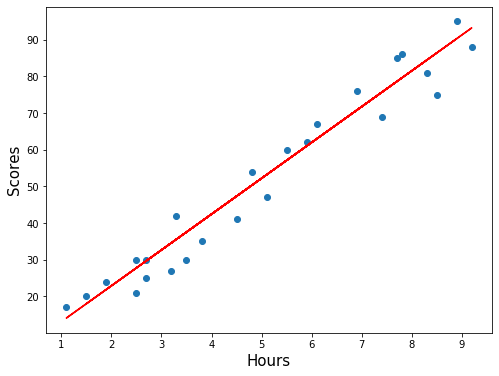

In [15]:
line = lin_reg.coef_*X+lin_reg.intercept_
plt.figure(figsize=(8, 6))
plt.ylabel('Scores', fontsize=15)
plt.xlabel('Hours', fontsize=15)
plt.scatter(X, y)
plt.plot(X, line, c='red')
plt.show()

## Predicting score for hours studied

In [16]:
# predicting score for hours studied
hours_studied = ([9.25],)
predicted_score = lin_reg.predict(hours_studied)
print()
print(f'If the student studied for 9.25 hours, he might score {predicted_score[0]}')


If the student studied for 9.25 hours, he might score 93.71811406400957


### Evaluating the model¶
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [17]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error =',mean_absolute_error(y_test, pred))
print('Mean Squared Error =',mean_squared_error(y_test, pred))

Mean Absolute Error = 5.677128923921542
Mean Squared Error = 33.846102479121825
